# Reconocimiento de patrones: Identificación de grupos o Clustering
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
![ ](images/blank.png)
![agents](images/binary_data_under_a_magnifying.jpg)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Clustering%20III.ipynb)

## Técnicas de clustering: *K-Means*

La técnica de *k-medias* (o *k-means*) es una de las técnicas de clustering más simples y más utilizadas. Es una técnica de *aprendizaje no supervisado*: la técnica debe clasificar objetos desconocidos a un conjunto de clases de las que apenas se conocen algunos parámetros y no las características de cada clase. En el caso de *k*-medias, lo único que se conoce es el número de grupos.

El objetivo del algoritmo de *k*-medias es particionar un conjunto de *n* datos ejemplo en *k* grupos, asociando objetos cercanos y distinguiendo objetos diferentes. El resultado al final del procedimiento es la generación de un "*prototipo de clase*".

En la imagen a continuación, se presentan 30 datos (puntos azules) que han sido agrupados en 4 clusters. Las líneas rojas representan fronteras (posibles) entre clase y las estrellas rojas representan prototipos de clase.

![ ](images/k-means0.png)

La clase es una generalización del cluster; una descripción conceptual del grupo representado por el conjunto de datos. La delimitación de una clase, construida de forma inductiva (a partir de ejemplos), suele no ser precisa: está limitada a los datos de que disponemos para modelarla, como se ilustra en la imagen siguiente. 

![ ](images/cluster-class.png)

En esta imagen, los datos (ficticios) conocidos nos han permitido generar un modelo de clase (area en azul). Sin embargo, la clase real es diferente, sólo que al crear la clase no conocíamos suficientes datos para modelarla fielmente (como los datos señalados como puntos rojos). Considérese, por ejemplo, el siguiente conjunto de bicicletas:

![ ](images/bicycles.png)

A partir de los datos disponibles podemos concluir, por ejemplo, que todas las bicicletas tienen un asiento y pedales... sin embargo, esta definción de la clase bicicleta no incluye los siguientes ejemplares:

[![ ](images/bicycles-2.png)](https://www.youtube.com/watch?v=KewMZ8sM0Uo)


### Algoritmo

El algoritmo k-means sigue los siguientes pasos (dado un conjunto de datos):

In [1]:
# Inicializar el ambiente
import numpy as np
import pandas as pd
import math
import random
import time
import os
import sys
from scipy.spatial import distance
np.set_printoptions(precision=2, suppress=True) # Cortar la impresión de decimales a 1

os.chdir('Data sets')
LARGER_DISTANCE = sys.maxsize
TALK = True # TALK = True, imprime resultados parciales

In [2]:
# Leer los datos de archivo
DATA_SET = pd.read_csv("datosProm.csv", names = ['A', 'B']).values
DATA_LEN = len(DATA_SET)

# Definir una clase para expresar puntos y su asignación a un cluster
class DataPoint:
    def __init__(self, p):
        self.value = p[:]
        
    def set_value(self, p):
        self.value = p
    
    def get_value(self):
        return self.value
    
    def set_cluster(self, cluster):
        self.cluster = cluster
    
    def get_cluster(self):
        return self.cluster

data = []
def initialize_dataset():
    for i in range(DATA_LEN):
        point = DataPoint(DATA_SET[i])
        point.set_cluster(None)
        data.append(point)
    return

# --------------------------
# Crear el conjunto de datos
initialize_dataset()

1) Definir el valor de $k$

In [3]:
NUM_CLUSTERS = 3

2) Seleccionar de manera arbitraria *k* puntos en el espacio de características como centros iniciales de  los clusters (centroides o centros de masa).
![ ](images/k-means1.png)

In [4]:
# Definir forma de muestreo; 0 = random, 1=head, 2=tail
SAMPLING_METHOD = 1 

centroids = []
def initialize_centroids():
    if (TALK) : 
        print("Centroides inicializados en:")
    for c in range(NUM_CLUSTERS):
        if (SAMPLING_METHOD == 0) :
            which = random.randint(0,DATA_LEN-1)
        elif (SAMPLING_METHOD == 1):
            which = c
        else :
            which = DATA_LEN-1 - c
                
        centroids.append(list(DATA_SET[which]))
        if (TALK) : 
            print(centroids[c])        
    if (TALK) : 
        print()
    
    return

# --------------------------
# Inicializar los centroides
initialize_centroids()

Centroides inicializados en:
[70.280000000000001, 42.125]
[0.0, 56.75]
[79.0, 2.5]



3) Asignar cada punto del conjunto de datos al cluster donde la distancia del punto al centroide es menor.
![ ](images/k-means2.png)

In [5]:
def update_clusters():
    changed = False
    
    for i in range(DATA_LEN):
        minDistance = LARGER_DISTANCE
        currentCluster = 0
        
        for j in range(NUM_CLUSTERS):
            dist = distance.euclidean(data[i].get_value(), centroids[j])
            if(dist < minDistance):
                minDistance = dist
                currentCluster = j
        
        if(data[i].get_cluster() is None or data[i].get_cluster() != currentCluster):
            data[i].set_cluster(currentCluster)
            changed = True
            
    members = [0] * NUM_CLUSTERS
    for i in range(DATA_LEN):
        members[data[i].get_cluster()] += 1
    
    if (TALK) : 
        for j in range(NUM_CLUSTERS):
            print("El cluster ", j, " incluye ", members[j], "miembros.")
        print()
            
    return changed

# --------------------------
# Actualizar los clusters
KEEP_WALKING = update_clusters()

El cluster  0  incluye  18 miembros.
El cluster  1  incluye  7 miembros.
El cluster  2  incluye  5 miembros.



4) Calcular los centroides a partir de los puntos en cada cluster. 
![ ](images/k-means3.png)

In [6]:
def update_centroids():    
    if (TALK) : 
        print("Los nuevos centroids son:")
    for j in range(NUM_CLUSTERS):
        means = [0] * DATA_SET.shape[1]
            
        clusterSize = 0
        for k in range(len(data)):
            if(data[k].get_cluster() == j):
                p = data[k].get_value()
                for i in range(DATA_SET.shape[1]):
                    means[i] += p[i]
                clusterSize += 1

        if(clusterSize > 0):
            for i in range(DATA_SET.shape[1]):
                centroids[j][i] = means[i] / clusterSize

        if (TALK) : 
            print(centroids[j])        
    if (TALK) : 
        print()
    
    return

# --------------------------
# Actualizar los centroides
update_centroids()

Los nuevos centroids son:
[80.957777777777778, 73.79605555555554]
[0.0, 73.886571428571415]
[84.009999999999991, 6.466800000000001]



5) Repetir los pasos 2 y 3 hasta que no haya cambios en los clusters.
![ ](images/k-means4.png)

In [7]:
while(KEEP_WALKING):
    KEEP_WALKING = update_clusters()
    if (KEEP_WALKING):
        update_centroids()
    else :
        if (TALK) : 
            print ("No más cambios.")    

El cluster  0  incluye  17 miembros.
El cluster  1  incluye  7 miembros.
El cluster  2  incluye  6 miembros.

Los nuevos centroids son:
[81.555294117647065, 76.078176470588218]
[0.0, 73.886571428571415]
[81.808333333333323, 11.222333333333333]

El cluster  0  incluye  16 miembros.
El cluster  1  incluye  7 miembros.
El cluster  2  incluye  7 miembros.

Los nuevos centroids son:
[82.259999999999991, 78.200249999999983]
[0.0, 73.886571428571415]
[80.161428571428573, 15.637]

El cluster  0  incluye  16 miembros.
El cluster  1  incluye  7 miembros.
El cluster  2  incluye  7 miembros.

No más cambios.


<hr style="border-width: 1px;">

El método $k$-means es un método muy robusto (aunque diversos autores han buscado maneras de eficientarlo, ver por ejemplo [este artículo](http://worldcomp-proceedings.com/proc/p2015/CSC2667.pdf) o [este otro](http://academics.smcvt.edu/jtrono/Papers/SMCClusteringPaper_DavidKronenberg.pdf). Su principal restricción es la selección adecuada del número de clusters, $k$. En casos más interesantes que nuestro ejemplo, conviene realizar un análisis previo de determinación de clusters, por dendrogramas, por ejemplo.

En el caso de los datos del *Pima Indian Diabetes Data Set*, por ejemplo, el análisis por dendrogramas ha arrojado:

              emb        gl2h         pad         ept        is2h         imc  \
count  393.000000  393.000000  393.000000  393.000000  393.000000  393.000000   
mean     3.295165  122.315522   70.671756   29.122137  155.717557   33.072519   
std      3.209425   31.435992   12.481277   10.513128  118.879630    7.023947   
min      0.000000    0.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   62.000000   21.000000   76.000000   28.400000   
50%      2.000000  119.000000   70.000000   29.000000  125.000000   33.200000   
75%      5.000000  143.000000   78.000000   37.000000  190.000000   37.100000   
max     17.000000  198.000000  110.000000   63.000000  846.000000   67.100000   

              fpd        edad       class  
count  393.000000  393.000000  393.000000  
mean     0.522476   30.839695    0.330789  
std      0.345232   10.199903    0.471097  
min      0.085000   21.000000    0.000000  
25%      0.270000   23.000000    0.000000  
50%   

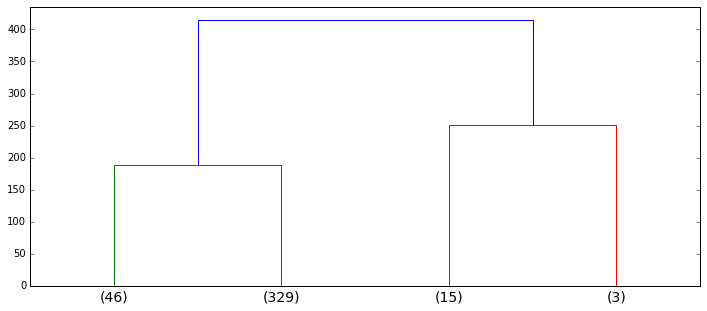

In [8]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

df = pd.read_csv("Pima Indian Data Set/pima-indians-diabetes.data", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])
df.loc[df['pad'] == 0,'pad'] = np.nan
df.loc[df['ept'] == 0,'ept'] = np.nan
df.loc[df['is2h'] == 0,'is2h'] = np.nan
df.loc[df['imc'] == 0,'imc'] = np.nan
df = df.dropna()
print(df.describe())

Z = linkage(df, 'centroid')
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=4, show_leaf_counts=True, leaf_font_size=14.)
plt.show()

Nótese que en este caso hemos desechado los datos incompletos.

Podemos tomar este dendrograma y probar suerte con $k=4$:

In [9]:
NUM_CLUSTERS = 4
TALK = False
DATA_SET = df.values
DATA_LEN = len(DATA_SET)
SAMPLING_METHOD = 0 

data = []
initialize_dataset()
centroids = []
initialize_centroids()

KEEP_WALKING = True
while(KEEP_WALKING):
    KEEP_WALKING = update_clusters()
    if (KEEP_WALKING):
        update_centroids()
    else :
        members = [0] * NUM_CLUSTERS
        for i in range(DATA_LEN):
            members[data[i].get_cluster()] += 1

        for j in range(NUM_CLUSTERS):
            print("\nCluster {}: {} miembros.".format(j, members[j]))
            print(np.asarray(centroids[j]))        


Cluster 0: 52 miembros.
[   4.25  149.62   74.04   30.87  291.48   35.58    0.56   33.9     0.5 ]

Cluster 1: 143 miembros.
[   3.89  133.31   71.69   30.71  160.43   34.11    0.54   33.29    0.5 ]

Cluster 2: 180 miembros.
[   2.57  101.34   68.62   26.7    73.44   31.14    0.48   27.64    0.12]

Cluster 3: 18 miembros.
[   3.11  165.83   73.44   35.67  548.83   36.96    0.66   34.56    0.67]


Y comparando con los resultados obtenido con sklearn.cluster.KMeans

In [10]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=4, init='random')
k_means.fit(df) 

print(k_means.cluster_centers_)

[[   3.75  133.74   71.99   30.96  166.51   34.22    0.56   33.08    0.49]
 [   2.74  102.71   68.66   26.84   75.11   31.23    0.47   28.02    0.14]
 [   3.11  165.83   73.44   35.67  548.83   36.96    0.66   34.56    0.67]
 [   4.24  150.76   73.78   30.24  301.18   35.57    0.57   34.07    0.51]]


<hr style="border-width: 3px;">

### Magic



In [11]:
import numpy as np 
import pandas as pd 
import pprint

#Lectura de datos en bruto
raw = pd.read_json("Magic/AllSets-x.json")

In [12]:
#Desplegar información general
print("Tipo de dato:", type(raw))
print("\n---> Dimensiones:", raw.shape)
print("\n---> Columnas:\n", raw.columns.values)

print("\n---> Llaves:\n", raw.keys())
print("\n---> Índices:\n", raw.index)

#Primeros datos
print("\n---> Primer renglón\n", raw.head(1))
print("\n---> Primer columna\n", raw.transpose().head(1))
print("\n---> Acceso por llaves ('10E')\n", raw['10E'])
print("\n---> Acceso por índices ('border')\n", raw.loc['border'][0])

Tipo de dato: <class 'pandas.core.frame.DataFrame'>

---> Dimensiones: (16, 199)

---> Columnas:
 ['10E' '2ED' '3ED' '4ED' '5DN' '5ED' '6ED' '7ED' '8ED' '9ED' 'ALA' 'ALL'
 'APC' 'ARB' 'ARC' 'ARN' 'ATH' 'ATQ' 'AVR' 'BFZ' 'BNG' 'BOK' 'BRB' 'BTD'
 'C13' 'C14' 'C15' 'CED' 'CEI' 'CHK' 'CHR' 'CM1' 'CMD' 'CN2' 'CNS' 'CON'
 'CPK' 'CSP' 'CST' 'DD2' 'DD3_DVD' 'DD3_EVG' 'DD3_GVL' 'DD3_JVC' 'DDC'
 'DDD' 'DDE' 'DDF' 'DDG' 'DDH' 'DDI' 'DDJ' 'DDK' 'DDL' 'DDM' 'DDN' 'DDO'
 'DDP' 'DDQ' 'DDR' 'DGM' 'DIS' 'DKA' 'DKM' 'DPA' 'DRB' 'DRK' 'DST' 'DTK'
 'EMA' 'EMN' 'EVE' 'EVG' 'EXO' 'EXP' 'FEM' 'FRF' 'FRF_UGIN' 'FUT' 'GPT'
 'GTC' 'H09' 'HML' 'HOP' 'ICE' 'INV' 'ISD' 'ITP' 'JOU' 'JUD' 'KLD' 'KTK'
 'LEA' 'LEB' 'LEG' 'LGN' 'LRW' 'M10' 'M11' 'M12' 'M13' 'M14' 'M15' 'MBS'
 'MD1' 'ME2' 'ME3' 'ME4' 'MED' 'MGB' 'MIR' 'MM2' 'MMA' 'MMQ' 'MOR' 'MPS'
 'MRD' 'NMS' 'NPH' 'ODY' 'OGW' 'ONS' 'ORI' 'PC2' 'PCY' 'PD2' 'PD3' 'PLC'
 'PLS' 'PO2' 'POR' 'PTK' 'RAV' 'ROE' 'RQS' 'RTR' 'S00' 'S99' 'SCG' 'SHM'
 'SOI' 'SOK' 'SOM' 'STH' 'THS

Una descripción de los códigos [aquí](http://mtgsalvation.gamepedia.com/Set#Expansion_sets) 

<font color="red" size="3">NOTA:</font> No intentar abrir esta página en la Universidad de Sonora, ya que los responsables de la Dirección de Informática de la Universidad se han erigido en máxima autoridad técnica y moral en el tema de informática, capaces de decidir qué información se puede consultar dentro del campus...
![](images/shame.png)


<table border="1" cellpadding="5" style="background-color:#FFFFFF;">
<tr>
<th scope="col" style="width:5em;"> Released
</th>
<th scope="col" style="width:18em;"> Set
</th>
<th scope="col" style="width:6em;"> Code
</th>
<th scope="col" style="width:8em;"> Type
</th>
</tr>
<tr>
<td> 1993-08 </td>
<td> <i>Alpha (Limited Edition)</i> </td>
<td> LEA (A) </td>
<td> Core set </td>
</tr>
<tr>
<td> 1993-10 </td>
<td> <i>Beta (Limited Edition)</i> </td>
<td> LEB (B) </td>
<td> Core set </td>
</tr>
<tr>
<td> 1993-12 </td>
<td> <i>Unlimited Edition</i> </td>
<td> 2ED (U) </td>
<td> Core set </td>
</tr>
<tr>
<td> 1993-12 </td>
<td> <i>Arabian Nights</i> </td>
<td> ARN (AN) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1994-03 </td>
<td> <i>Antiquities</i> </td>
<td>ATQ (AQ) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1994-04 </td>
<td> <i>Revised Edition</i> </td>
<td> 3ED (RV) </td>
<td> Core set </td>
</tr>
<tr>
<td> 1994-06 </td>
<td> <i>Legends</i> </td>
<td> LEG (LE) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1994-08 </td>
<td> <i>The Dark</i> </td>
<td> DRK (DK) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1994-11 </td>
<td> <i>Fallen Empires</i> </td>
<td> FEM (FE) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1995-05 </td>
<td> <i>4th Edition</i> </td>
<td> 4ED (4E) </td>
<td> Core set </td>
</tr>
<tr>
<td> 1995-06 </td>
<td> <i>Ice Age</i> </td>
<td> ICE (IA) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1995-07 </td>
<td> <i> Chronicles</i> </td>
<td> CHR (CH) </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 1995-08 </td>
<td> <i> Renaissance</i> </td>
<td> </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 1995-10 </td>
<td> <i> Homelands</i> </td>
<td> HML (HL) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1996-06 </td>
<td> <i> Alliances</i> </td>
<td> ALL (AL) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1996-10 </td>
<td> <i> Mirage</i> </td>
<td> MIR (MI) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1997-02 </td>
<td> <i> Visions</i> </td>
<td> VIS (VI) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1997-03 </td>
<td> <i> 5th Edition</i> </td>
<td> 5ED (5E) </td>
<td> Core set </td>
</tr>
<tr>
<td> 1997-05 </td>
<td> <i> Portal</i> </td>
<td> POR (PO) </td>
<td> Starter set </td>
</tr>
<tr>
<td> 1997-06 </td>
<td> <i> Weatherlight</i> </td>
<td> WTH (WL) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1997-10 </td>
<td> <i>Tempest</i> </td>
<td> TMP (TE) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1998-02 </td>
<td> <i> Stronghold</i> </td>
<td> STH (ST) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1998-06 </td>
<td> <i> Exodus</i> </td>
<td> EXO (EX) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1998-06 </td>
<td> <i> Portal Second Age</i> </td>
<td> P02 (P2) </td>
<td> Starter set </td>
</tr>
<tr>
<td> 1998-08 </td>
<td> <i> Unglued</i> </td>
<td> UGL (UG) </td>
<td> Un-set </td>
</tr>
<tr>
<td> 1998-10 </td>
<td> <i> Urza's Saga</i> </td>
<td> USG (US) </td>
<td> Expansion set </td></tr>
<tr>
<td> 1998-11 </td>
<td> <i> Anthologies</i> </td>
<td> ATH </td>
<td> Box set </td>
</tr>
<tr>
<td> 1999-02 </td>
<td> <i> Urza's Legacy</i> </td>
<td> ULG (UL) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1999-04 </td>
<td> <i> 6th Edition</i> </td>
<td> 6ED (6E) </td>
<td> Core set </td>
</tr>
<tr>
<td> 1999-06 </td>
<td> <i> Urza's Destiny</i> </td>
<td> UDS (UD) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1999-07 </td>
<td> <i> Portal Three Kingdoms</i> </td>
<td> PTK (P3) </td>
<td> Starter set </td>
</tr>
<tr>
<td> 1999-08 </td>
<td> <i> Starter 1999</i> </td>
<td> S99 </td>
<td> Starter set </td>
</tr>
<tr>
<td> 1999-09 </td>
<td> <i> Mercadian Masques</i> </td>
<td> MMQ (MM) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 1999-11 </td>
<td> <i> Battle Royale</i> </td>
<td> BRB </td>
<td> Box set </td>
</tr>
<tr>
<td> 2000-02 </td>
<td> <i> Nemesis</i> </td>
<td> NEM (NE) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2000-04 </td>
<td> <i> Starter 2000</i> </td>
<td> S00 </td>
<td> Starter set </td>
</tr>
<tr>
<td> 2000-06 </td>
<td> <i> Prophecy</i> </td>
<td> PCY (PR) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2000-09 </td>
<td> <i> Invasion</i> </td>
<td> INV (IN) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2000-10 </td>
<td> <i> Beatdown</i> </td>
<td> BTD </td>
<td> Box set </td>
</tr>
<tr>
<td> 2001-01 </td>
<td> <i> Planeshift</i> </td>
<td> PLS (PL) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2001-04 </td>
<td> <i>7th Edition</i> </td>
<td> 7ED (7E) </td>
<td> Core set </td>
</tr>
<tr>
<td> 2001-05 </td>
<td> <i> Apocalypse</i> </td>
<td> APC (AP) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2001-10 </td>
<td> <i> Odyssey</i> </td>
<td> ODY (OD) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2001-12 </td>
<td> <i> Deckmasters 2001</i> </td>
<td> DKM </td>
<td> Box set </td>
</tr>
<tr>
<td> 2002-02 </td>
<td> <i> Torment</i> </td>
<td> TOR (TO) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2002-05 </td>
<td> <i> Judgment</i> </td>
<td> JUD (JU) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2002-10 </td>
<td> <i> Onslaught</i> </td>
<td> ONS (ON) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2003-01 </td>
<td> <i> Legions</i> </td>
<td> LGN (LE) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2003-05 </td>
<td> <i> Scourge</i> </td>
<td>SCG (SC) </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2003-07 </td>
<td> <i> 8th Edition</i> </td>
<td> 8ED (8E) </td>
<td> Core set </td>
</tr>
<tr>
<td> 2003-10 </td>
<td> <i> Mirrodin</i> </td>
<td> MRD </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2004-02 </td>
<td> <i> Darksteel</i> </td>
<td> DST </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2004-06 </td>
<td> <i> Fifth Dawn</i> </td>
<td> 5DN </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2004-10 </td>
<td> <i> Champions of Kamigawa</i> </td>
<td> CHK </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2004-11 </td>
<td> <i> Unhinged</i> </td>
<td> UNH </td>
<td> Un-set </td>
</tr>
<tr>
<td> 2005-02 </td>
<td> <i> Betrayers of Kamigawa</i> </td>
<td> BOK </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2005-06 </td>
<td> <i> Saviors of Kamigawa</i> </td>
<td> SOK </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2005-07 </td>
<td> <i> 9th Edition</i> </td>
<td> 9ED </td>
<td> Core set </td>
</tr>
<tr>
<td> 2005-10 </td>
<td> <i> Ravnica: City of Guilds</i> </td>
<td> RAV </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2006-02 </td>
<td> <i> Guildpact</i> </td>
<td> GPT </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2006-05 </td>
<td> <i> Dissension</i> </td>
<td> DIS </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2006-07 </td>
<td> <i> Coldsnap</i> </td>
<td> CSP </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2006-10 </td>
<td> <i> Time Spiral</i> </td>
<td> TSP/TSB </td>
<td>Expansion set </td>
</tr>
<tr>
<td> 2007-02 </td>
<td> <i> Planar Chaos</i> </td>
<td> PLC </td>
<td>Expansion set </td>
</tr>
<tr>
<td> 2007-05 </td>
<td> <i> Future Sight</i> </td>
<td> FUT </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2007-07 </td>
<td> <i> 10th Edition</i> </td>
<td> 10E </td>
<td> Core set </td>
</tr>
<tr>
<td> 2007-09 </td>
<td> <i> Masters Edition</i> </td>
<td> MED </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2007-10 </td>
<td> <i> Lorwyn</i> </td>
<td> LRW </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2007-11 </td>
<td> <i> Duel Decks: Elves vs. Goblins</i> </td>
<td> EVG </td>
<td> Box set </td>
</tr>
<tr>
<td> 2008-02 </td>
<td> <i> Morningtide</i> </td>
<td> MOR </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2008-05 </td>
<td> <i> Shadowmoor</i> </td>
<td> SHM </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2008-06 </td>
<td> <i> Eventide</i> </td>
<td> EVE </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2008-08 </td>
<td> <i> From the Vault: Dragons</i> </td>
<td> DRB </td>
<td> Box set </td>
</tr>
<tr>
<td> 2008-09 </td>
<td> <i> Masters Edition II</i> </td>
<td> ME2 </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2008-09 </td>
<td> <i> Shards of Alara</i> </td>
<td> ALA </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2008-11 </td>
<td> <i> Duel Decks: Jace vs. Chandra</i> </td>
<td> DD2 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2009-02 </td>
<td> <i> Conflux</i> </td>
<td> CON </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2009-04 </td>
<td> <i> Duel Decks: Divine vs. Demonic</i> </td>
<td> DDC </td>
<td> Box set </td>
</tr>
<tr>
<td> 2009-04 </td>
<td> <i> Alara Reborn</i> </td>
<td> ARB </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2009-07 </td>
<td> <i> Magic 2010</i> </td>
<td> M10 </td>
<td> Core set </td>
</tr>
<tr>
<td> 2009-08 </td>
<td> <i> Commander Theme Decks</i> </td>
<td> TD0 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2009-08 </td>
<td> <i> From the Vault: Exiled</i> </td>
<td> V09 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2009-09 </td>
<td> <i> Planechase (2009)</i> </td>
<td> HOP </td>
<td> Supplemental set </td>
</tr>
<tr>
<td> 2009-09 </td>
<td> <i> Masters Edition III</i> </td>
<td> ME3 </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2009-10 </td>
<td> <i> Zendikar</i> </td>
<td> ZEN </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2009-10 </td>
<td> <i> Duel Decks: Garruk vs. Liliana</i> </td>
<td> DDD </td>
<td> Box set </td>
</tr>
<tr>
<td> 2009-11 </td>
<td> <i> Premium Deck Series: Slivers</i> </td>
<td> H09 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2010-02 </td>
<td> <i> Worldwake</i> </td>
<td> WWK </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2010-03 </td>
<td> <i> Duel Decks: Phyrexia vs. The Coalition</i> </td>
<td> DDE </td>
<td> Box set </td>
</tr>
<tr>
<td> 2010-04 </td>
<td> <i> Rise of the Eldrazi</i> </td>
<td> ROE </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2010-05 </td>
<td> <i> Deck Builder's Toolkit (2010)</i> </td>
<td> </td>
<td> Box set </td>
</tr>
<tr>
<td> 2010-06 </td>
<td> <i> Duels of the Planeswalkers</i> </td>
<td> DPA </td>
<td> Box set </td>
</tr>
<tr>
<td> 2010-06 </td>
<td> <i> Archenemy</i> </td>
<td> ARC </td>
<td> Supplemental set </td>
</tr>
<tr>
<td> 2010-07 </td>
<td> <i> Magic 2011</i> </td>
<td> M11 </td>
<td> Core set </td>
</tr>
<tr>
<td> 2010-08 </td>
<td> <i> From the Vault: Relics</i> </td>
<td> V10 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2010-09 </td>
<td> <i> Duel Decks: Elspeth vs. Tezzeret</i> </td>
<td> DDF </td>
<td> Box set </td>
</tr>
<tr>
<td> 2010-10 </td>
<td> <i> Scars of Mirrodin</i> </td>
<td> SOM </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2010-11 </td>
<td> <i> Magic Online Deck Series</i> </td>
<td> TD0 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2010-11 </td>
<td> <i> Premium Deck Series: Fire &amp; Lightning</i> </td>
<td> PD2 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2010-11 </td>
<td> <i> Momir Basic Event Deck</i> </td>
<td> </td>
<td> Box set </td>
</tr>
<tr>
<td> 2011-01 </td>
<td> <i> Masters Edition IV</i> </td>
<td> ME4 </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2011-02 </td>
<td> <i> Mirrodin Besieged</i> </td>
<td> MBS </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2011-03 </td>
<td> <i> Deck Builder's Toolkit (2011)</i> </td>
<td align="center"> </td>
<td> Box set </td>
</tr>
<tr>
<td> 2011-04 </td>
<td> <i> Duel Decks: Knights vs. Dragons</i> </td>
<td> DDG </td>
<td> Box set </td>
</tr>
<tr>
<td> 2011-05 </td>
<td> <i> New Phyrexia</i> </td>
<td> NPH </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2011-06 </td>
<td> <i> Commander (2011)</i> </td>
<td> CMD </td>
<td> Box set </td>
</tr>
<tr>
<td> 2011-07 </td>
<td> <i> Magic 2012</i> </td>
<td> M12 </td>
<td> Core set </td>
</tr>
<tr>
<td> 2011-08 </td>
<td> <i> From the Vault: Legends</i> </td>
<td> V11 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2011-09 </td>
<td> <i> Duel Decks: Ajani vs. Nicol Bolas</i> </td>
<td> DDH </td>
<td> Box set </td>
</tr>
<tr>
<td> 2011-09 </td>
<td> <i> Innistrad</i> </td>
<td> ISD </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2011-11 </td>
<td> <i> Premium Deck Series: Graveborn</i> </td>
<td> PD3 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2012-02 </td>
<td> <i> Dark Ascension</i> </td>
<td> DKA </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2012-03 </td>
<td> <i> Duel Decks: Venser vs. Koth</i> </td>
<td> DDI </td>
<td> Box set </td>
</tr>
<tr>
<td> 2012-05 </td>
<td> <i> Avacyn Restored</i> </td>
<td> AVR </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2012-05 </td>
<td> <i> Planechase 2012</i> </td>
<td> PC2 </td>
<td> Supplemental set </td>
</tr>
<tr>
<td> 2012-07 </td>
<td> <i> Magic 2013</i> </td>
<td> M13 </td>
<td> Core set </td>
</tr>
<tr>
<td> 2012-08 </td>
<td> <i> From the Vault: Realms</i> </td>
<td> V12 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2012-09 </td>
<td> <i> Duel Decks: Izzet vs. Golgari</i> </td>
<td> DDJ </td>
<td> Box set </td>
</tr>
<tr>
<td> 2012-10 </td>
<td>  Return to Ravnica</i> </td>
<td> RTR </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2012-11 </td>
<td> <i> Commander's Arsenal</i> </td>
<td> CM1 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2013-01 </td>
<td> <i> Duel Decks: Mirrodin Pure vs. New Phyrexia</i> </td>
<td> TD2 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2013-02 </td>
<td> <i> Gatecrash</i> </td>
<td> GTC </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2013-03 </td>
<td> <i> Duel Decks: Sorin vs. Tibalt</i> </td>
<td> DDK </td>
<td> Box set </td>
</tr>
<tr>
<td> 2013-05 </td>
<td> <i> Dragon's Maze</i> </td>
<td> DGM </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2013-06 </td>
<td> <i> Modern Masters (2013)</i> </td>
<td> MMA </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2013-07 </td>
<td> <i> Magic 2014</i> </td>
<td> M14 </td>
<td> Core set </td>
</tr>
<tr>
<td> 2013-08 </td>
<td> <i> From the Vault: Twenty</i> </td>
<td> V13 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2013-09 </td>
<td> <i> Duel Decks: Heroes vs. Monsters</i> </td>
<td> DDL </td>
<td> Box set </td>
</tr>
<tr>
<td> 2013-09 </td>
<td> <i> Theros</i> </td>
<td> THS </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2013-11 </td>
<td> <i> Commander 2013 </i> </td>
<td> C13 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2014-02 </td>
<td> <i> Born of the Gods</i> </td>
<td> BNG </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2014-03 </td>
<td> <i> Duel Decks: Jace vs. Vraska</i> </td>
<td> DDM </td>
<td> Box set </td>
</tr>
<tr>
<td> 2014-05 </td>
<td> <i> Journey into Nyx</i> </td>
<td> JOU </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2014-05 </td>
<td> <i> Modern Event Deck</i> </td>
<td> MD1 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2014-06 </td>
<td> <i> Conspiracy</i> </td>
<td> CNS </td>
<td> Supplemental set </td>
</tr>
<tr>
<td> 2014-06 </td>
<td> <i> Vintage Masters</i> </td>
<td> VMA </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2014-07 </td>
<td> <i> Magic 2015</i> </td>
<td> M15 </td>
<td> Core set </td>
</tr>
<tr>
<td> 2014-08 </td>
<td> <i> From the Vault: Annihilation</i> </td>
<td> V14</td>
<td> Box set </td>
</tr>
<tr>
<td> 2014-10 </td>
<td> <i> Duel Decks: Speed vs. Cunning</i> </td>
<td> DDN </td>
<td> Box set </td>
</tr>
<tr>
<td> 2014-10 </td>
<td> <i> Khans of Tarkir </td></i>
<td> KTK </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2014-11 </td>
<td> <i> Commander 2014</i> </td>
<td> C14 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2014-12 </td>
<td> <i> Duel Decks Anthology</i> </td>
<td> DD3 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2015-01 </td>
<td> <i> Fate Reforged</i> </td>
<td> FRF </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2015-02 </td>
<td> <i> Duel Decks: Elspeth vs. Kiora</i> </td>
<td> DDO </td>
<td> Box set </td>
</tr>
<tr>
<td> 2015-03 </td>
<td> <i> Dragons of Tarkir </td></i>
<td> DTK </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2015-05 </td>
<td> <i> Tempest Remastered</i> </td>
<td> TPR </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2015-05 </td>
<td> <i> Modern Masters 2015</i> </td>
<td> MM2 </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2015-07 </td>
<td> <i> Magic Origins</i> </td>
<td> ORI </td>
<td> Core set </td>
</tr>
<tr>
<td> 2015-08 </td>
<td> <i> From the Vault: Angels</i> </td>
<td> V15 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2015-08 </td>
<td> <i> Duel Decks: Zendikar vs. Eldrazi</i> </td>
<td> DDP </td>
<td> Box set </td>
</tr>
<tr>
<td> 2015-10 </td>
<td> <i> Battle for Zendikar</i> </td>
<td> BFZ </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2015-10<br />2016-01 </td>
<td> <i> Zendikar Expeditions</i> </td>
<td> EXP </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2015-11 </td>
<td> <i> Commander 2015</i> </td>
<td> C15 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2015-11 </td>
<td> <i> Legendary Cube</i> </td>
<td> PZ1 </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2016-01 </td>
<td> <i> Oath of the Gatewatch</i> </td>
<td> OGW </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2016-02 </td>
<td> <i> Duel Decks: Blessed vs. Cursed</i> </td>
<td> DDQ </td>
<td> Box set </td>
</tr>
<tr>
<td> 2016-04 </td>
<td> <i> Welcome Deck 2016</i> </td>
<td> W16 </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2016-04 </td>
<td> <i> Shadows over Innistrad</i> </td>
<td> SOI </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2016-06 </td>
<td> <i> Eternal Masters</i> </td>
<td> EMA </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2016-07 </td>
<td> <i> Eldritch Moon</i> </td>
<td> EMN </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2016-08 </td>
<td> <i> From the Vault: Lore</i> </td>
<td> V16 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2016-08 </td>
<td> <i> Conspiracy: Take the Crown</i> </td>
<td> CN2 </td>
<td> Supplemental set </td>
</tr>
<tr>
<td> 2016-09 </td>
<td> <i> Duel Decks: Nissa vs. Ob Nixilis</i> </td>
<td> DDR </td>
<td> Box set </td>
</tr>
<tr>
<td> 2016-09 </td>
<td> <i> Kaladesh</i> </td>
<td> KLD </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2016-09<br />2017-01 </td>
<td> <i> Kaladesh Inventions</i> </td>
<td> MPS </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2016-11 </td>
<td> <i> Commander 2016</i> </td>
<td> C16 </td>
<td> Box set </td>
</tr>
<tr>
<td> 2016-11 </td>
<td> <i> You Make the Cube</i> </td>
<td> </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2016-11 </td>
<td> <i> Planechase Anthology</i> </td>
<td> PCA </td>
<td> Box set </td>
</tr>
<tr>
<td> 2017-01 </td>
<td> <i> Aether Revolt</i> </td>
<td> AER </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2017-03 </td>
<td> <i> Modern Masters 2017</i> </td>
<td> MM3 </td>
<td> Compilation set </td>
</tr>
<tr>
<td> 2017-03 </td>
<td> <i> Duel Decks: Mind vs. Might</i> </td>
<td> DDS </td>
<td> Box set </td>
</tr>
<tr>
<td> 2017-04 </td>
<td> <i> Amonkhet</i> </td>
<td> AKH </td>
<td> Expansion set </td>
</tr>
<tr>
<td> 2017-06 </td>
<td> <i> Commander Anthology</i> </td>
<td> CMA </td>
<td> Box set </td>
</tr>
<tr>
<td> 2017-06 </td>
<td> <i> Archenemy: Nicol Bolas</i> </td>
<td> </td>
<td> Supplemental set </td>
</tr>
<tr>
<td> 2017-07 </td>
<td> <i> Hour of Devastation</i> </td>
<td> HOU </td>
<td> Expansion set </td>
</tr></table>

In [13]:
print("--->10E: 10th Edition")
pprint.pprint(raw['10E'])

print("\n--->ALA: Shards of Alara")
pprint.pprint(raw['ALA'])

print("\n--->CHR: Chronicles")
pprint.pprint(raw['CHR'])

print("\n--->POR: Portal")
pprint.pprint(raw['POR'])

print("\n--->UGL: Unglued")
pprint.pprint(raw['UGL'])

print("\n--->UGL: Unglued")
pprint.pprint(raw['ATH'])

--->10E: 10th Edition
block                                                               NaN
booster               [rare, uncommon, uncommon, uncommon, common, c...
border                                                            black
cards                 [{'mciNumber': '10e/en/1', 'multiverseid': 130...
code                                                                10E
gathererCode                                                        NaN
magicCardsInfoCode                                                  10e
magicRaritiesCodes                                                  NaN
mkm_id                                                               74
mkm_name                                                  Tenth Edition
name                                                      Tenth Edition
oldCode                                                             NaN
onlineOnly                                                          NaN
releaseDate                               

In [14]:
pprint.pprint(raw['10E']['cards'][0])

{'artist': 'Pete Venters',
 'cmc': 7,
 'colorIdentity': ['W'],
 'colors': ['White'],
 'flavor': '"The will of all, by my hand done."',
 'foreignNames': [{'language': 'Chinese Simplified',
                   'multiverseid': 147645,
                   'name': '祖灵的爱民'},
                  {'language': 'Chinese Traditional',
                   'multiverseid': 151229,
                   'name': '祖靈的愛民'},
                  {'language': 'French',
                   'multiverseid': 149934,
                   'name': "Élu de l'Ancêtre"},
                  {'language': 'German',
                   'multiverseid': 148411,
                   'name': 'Ausgewählter der Ahnfrau'},
                  {'language': 'Italian',
                   'multiverseid': 148794,
                   'name': "Prescelto dell'Antenata"},
                  {'language': 'Japanese',
                   'multiverseid': 148028,
                   'name': '祖神に選ばれし者'},
                  {'language': 'Portuguese (Brazil)',
      

In [15]:
# Aux variables
keeps = ['name', 'colors', 'types', 'cmc', 'power', 'toughness']

# Data fusion
mtg = []
for col in raw.columns.values:
    release = pd.DataFrame(raw[col]['cards'])
    release = release.loc[:, keeps]
    mtg.append(release)
mtg = pd.concat(mtg)
mtg[['power','toughness']] = mtg[['power','toughness']].apply(pd.to_numeric, errors='coerce')

mtg = mtg.dropna().sample(100)


print(mtg)
print(mtg.describe())

                           name          colors       types  cmc  power  \
228            Scavenging Ghoul         [Black]  [Creature]  4.0    2.0   
230              Savage Ventmaw    [Red, Green]  [Creature]  6.0    4.0   
84           Gatherer of Graces         [Green]  [Creature]  2.0    1.0   
200         Lightning Elemental           [Red]  [Creature]  4.0    4.0   
7                   Azure Drake          [Blue]  [Creature]  4.0    2.0   
271             Springing Tiger         [Green]  [Creature]  4.0    3.0   
75                   Muck Drubb         [Black]  [Creature]  5.0    3.0   
205               Radjan Spirit         [Green]  [Creature]  4.0    3.0   
13          Icatian Javelineers         [White]  [Creature]  1.0    1.0   
140               Orcish Farmer           [Red]  [Creature]  3.0    2.0   
15                    Spitemare    [White, Red]  [Creature]  4.0    3.0   
176           Vildin-Pack Alpha           [Red]  [Creature]  3.0    4.0   
24                  Shu G

In [16]:
#mtg = pd.DataFrame(mtg)

#new_df = mtg.apply(lambda types: types[0])
#print(new_df)

mtg2 = mtg['colors']

#for m in mtg.iterrows():
#    print(m[1][1][0])
    
print(mtg2)

228           [Black]
230      [Red, Green]
84            [Green]
200             [Red]
7              [Blue]
271           [Green]
75            [Black]
205           [Green]
13            [White]
140             [Red]
15       [White, Red]
176             [Red]
24            [White]
161           [Green]
117           [Green]
109           [Black]
116           [Green]
68             [Blue]
87              [Red]
87            [Black]
243           [Green]
102           [Green]
106     [Blue, Green]
87              [Red]
106             [Red]
49              [Red]
89            [Black]
174             [Red]
26            [White]
80             [Blue]
            ...      
105           [Green]
162           [White]
83             [Blue]
92             [Blue]
27             [Blue]
86              [Red]
92     [Black, Green]
27            [White]
362             [Red]
122           [Green]
37            [Green]
280           [Green]
44             [Blue]
67             [Blue]
164       

<hr style="border-width: 3px;">

### Tarea 5

* Realice la identificación de clases por $k$-means de los datos de los sobrevivientes del Titanic. 

**Fecha de entrega**: Martes 21 de febrero.